<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/Sample%20ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Shared Housing as a Solution to Intergenerational Homelessness in Camden City, Camden NJ**
Camden City with a poverty rate of 36%, contributes nearly 68% to the homeless population in New Jersey. According to recent estimates, Camden County's unsheltered homeless count has surged, with more than 84% of the county's unsheltered individuals residing in Camden City alone (U.S. Census Bureau, 2021; Monarch Housing, 2024).
Of particular concern is the demographic composition of Camden's homeless population, as 316 individuals fall within the 18 to 44 age range—a vibrant group whose potential contributions to economic development are hindered by the destabilizing effects of homelessness. The constant stress of survival in unstable housing situations leads to chronic physical and mental health conditions, low educational attainment, and difficulties in securing long-term employment (Shinn et al., 2005). The Corporation for Supportive Housing (2015) estimated that without intervention, 50% of those experiencing homelessness for the first time will have additional episodes.
This underscores the urgent need for innovative and proactive "prevention-as-cure" approaches to address this crisis to alter the trajectory of homelessness for future generations significantly.


**Research Objective**
To explre the potential of formal shared housing program for single adults at risk of homelessness in Camden, NJ.

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [3]:
#!python --version
gpd.__version__

'1.0.1'

### Map of homeless population in New Jersey

These two maps show the symbiotic relationship between poverty and homlessness across new Jersey counties.

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


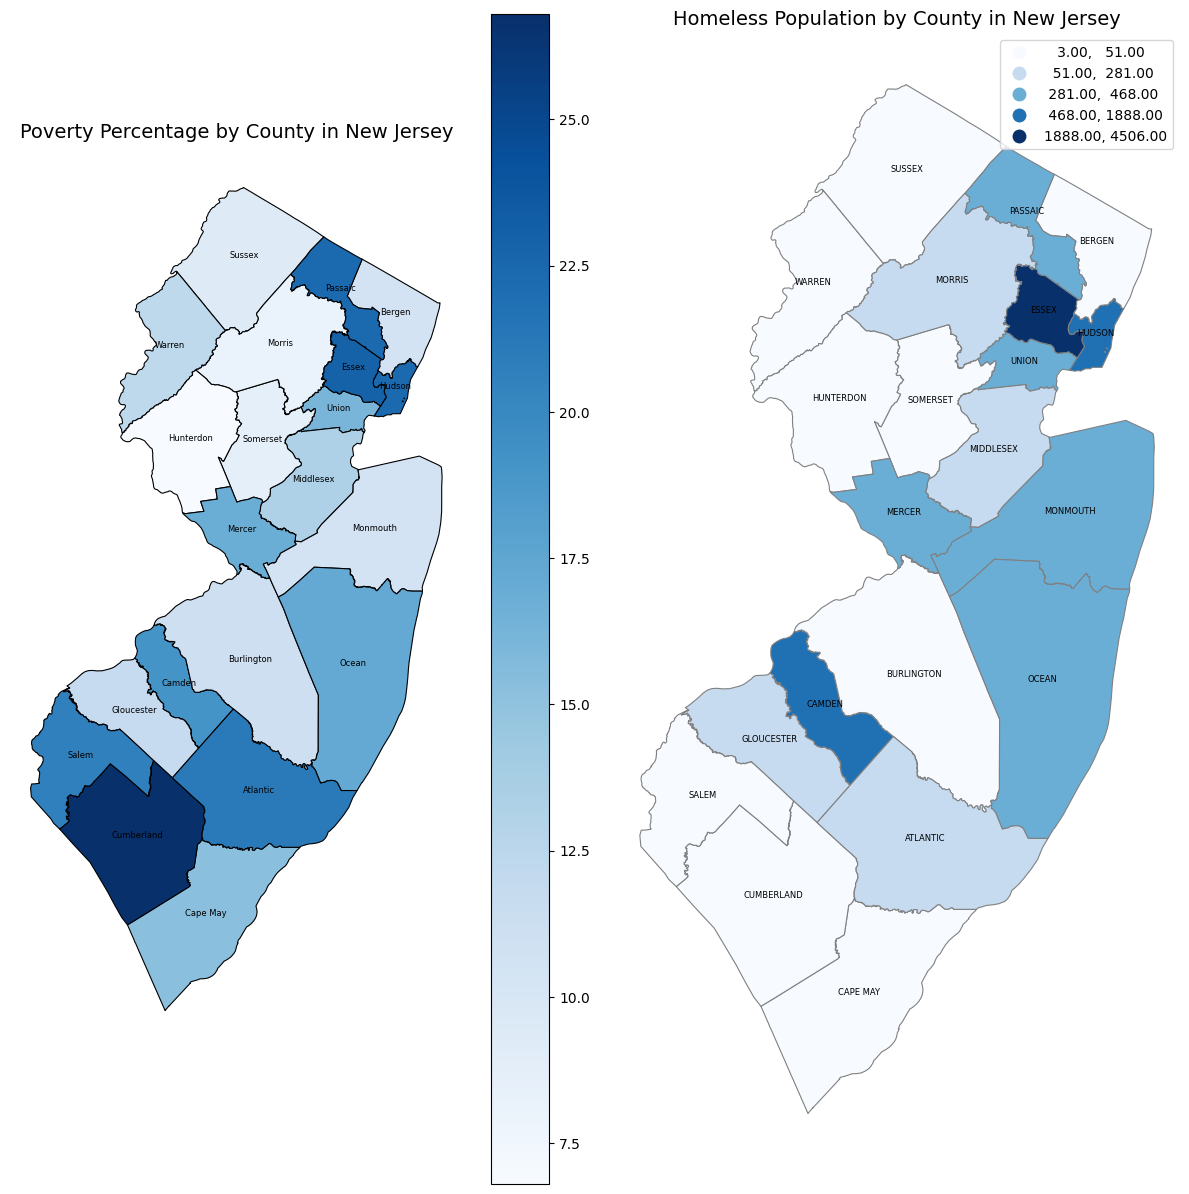

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data for Poverty Percentage by County
data = {
    'County': ['Cumberland', 'Essex', 'Hudson', 'Passaic', 'Atlantic', 'Salem', 'Camden', 'Ocean',
               'Mercer', 'Union', 'Cape May', 'Middlesex', 'Warren', 'Gloucester',
               'Burlington', 'Bergen', 'Monmouth', 'Sussex', 'Somerset', 'Morris', 'Hunterdon'],
    'Value (Percent)': [26.8, 22.9, 22.4, 22.4, 21.1, 20.7, 19.1, 17.2, 16.8, 16.1,
                        15.3, 13.3, 12.3, 11.8, 11.1, 10.5, 10.5, 9.3, 8.6, 8.1, 6.8]
}
df = pd.DataFrame(data)
df['County'] = df['County'].str.strip()

# Load and filter New Jersey counties shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)
nj_counties = counties[counties['STATEFP'] == '34']  # FIPS code for NJ

# Merge Poverty Percentage Data
nj_counties['NAME'] = nj_counties['NAME'].str.replace("County", "").str.strip()
nj_counties = nj_counties.merge(df, how='left', left_on='NAME', right_on='County')

# Load and merge Homeless Population Data
Chronicity = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/chronic.xlsx')
Chronicity['COUNTY'] = Chronicity['County'].str.upper().str.strip()
nj_counties['COUNTY'] = nj_counties['NAME'].str.upper().str.strip()
njMerged = nj_counties.merge(Chronicity, left_on='COUNTY', right_on='COUNTY', how='left')

# Plotting Side by Side Maps
fig, axes = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

# First Map - Poverty Percentage by County
nj_counties.plot(ax=axes[0], column='Value (Percent)', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
axes[0].set_title('Poverty Percentage by County in New Jersey', fontsize=14)
axes[0].set_axis_off()
for _, row in nj_counties.iterrows():
    centroid = row['geometry'].centroid
    axes[0].text(centroid.x, centroid.y, row['NAME'], fontsize=6, ha='center')

# Second Map - Homeless Population by County
njMerged.plot(ax=axes[1], column='population', cmap='Blues', scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.8, legend=True)
axes[1].set_title('Homeless Population by County in New Jersey', fontsize=14)
axes[1].set_axis_off()
for _, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    axes[1].text(centroid.x, centroid.y, row['COUNTY'], fontsize=6, ha='center')

plt.tight_layout()
plt.show();


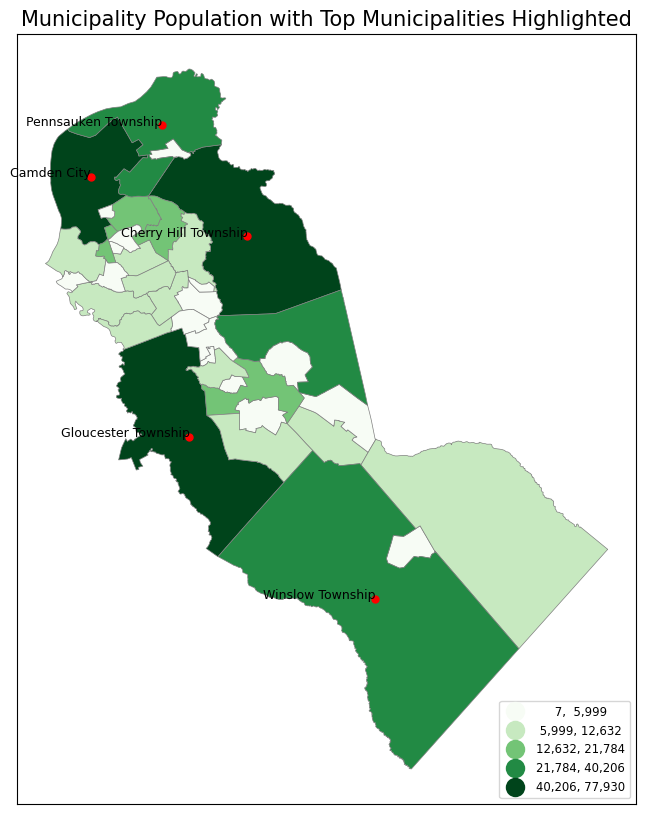

In [74]:
import geopandas as gpd
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

# Download and extract the municipality shapefile
!wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip
with zipfile.ZipFile('Municipality.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the New Jersey municipalities shapefile
njMun = gpd.read_file('Municipalities.shp')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

# Load the municipality population data
MunPop = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Merge the data
njMun1 = njMun.merge(MunPop, on='Municipality', how='left')

# Filter top 5 municipalities with the highest populations
top_municipalities = njMun1.nlargest(5, 'population')

# Plot the population data with pins for top municipalities
fig, ax = plt.subplots(1, figsize=(10, 10))
njMun1.plot(ax=ax, column='population', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
            edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}",
            'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})

# Add pins and labels for top municipalities
for idx, row in top_municipalities.iterrows():
    ax.plot(row.geometry.centroid.x, row.geometry.centroid.y, marker='o', color='red', markersize=5)
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(),
            fontsize=9, ha='right', color='black')

ax.set_title("Municipality Population with Top Municipalities Highlighted", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
plt.show();


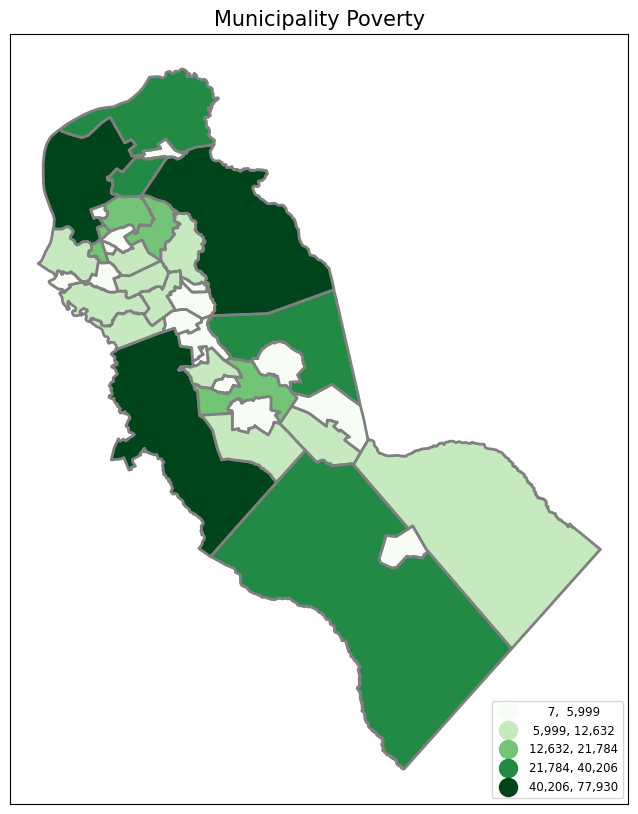

In [81]:
# Load data and specify header row
MunPov = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality%20poverty.xlsx', header=1)


njMun3 = njMun.merge(MunPov, on='Municipality', how='left')

# Plot the Poverty data
fig, ax = plt.subplots(1, figsize=(10, 10))
njMun1.plot(ax=ax, column='population', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
            edgecolor='grey', linewidth=2, legend_kwds={"fmt": "{:,.0f}",
            'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})

ax.set_title("Municipality Poverty", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
plt.show();

<Axes: >

[]

[]

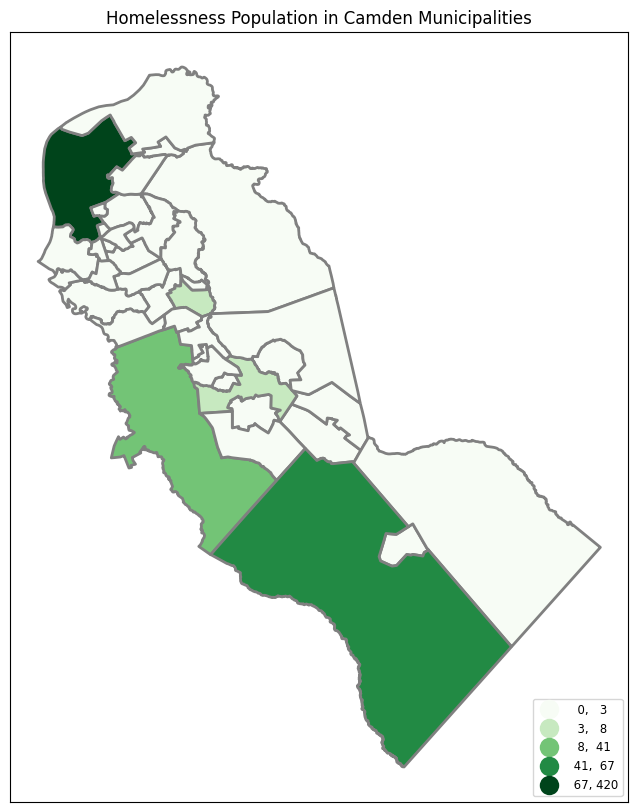

In [77]:
MunHom=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20homelessness.xlsx')
MunHom['Municipality'] = MunHom['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

njMun2 = njMun.merge(MunHom, on='Municipality', how='left')
fig, ax = plt.subplots(1, figsize=(10,10))
# Plot with specified color and edgecolor

njMun2.plot(ax=ax,column='Homelessness',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()

ax.title.set_text("Homelessness Population in Camden Municipalities")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [76]:
medinc = pd.read_stata('https://github.com/OluPaul22/data/blob/main/MedIncomeNJ.dta?raw=true')

camden_county.MedInc.hist(bins=50)

NameError: name 'camden_county' is not defined

In [ ]:
# Rename the 'County' column to 'COUNTY' in the Chronicity DataFrame
Chronicity.rename(columns={'County': 'COUNTY'}, inplace=True)

# Convert the contents of the 'COUNTY' column to uppercase
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.upper()

# Check the updated DataFrame
print(Chronicity.head())

         COUNTY  population
0    ATLANTIC           214
1      BERGEN            51
2  BURLINGTON             3
3       CAMDEN         1888
4      CAPE MAY           4


In [ ]:
njC0.dtypes
njC0.head(3)

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,int64


,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135..."


In [ ]:
njC0['COUNTY'] = njC0['COUNTY'].str.strip().str.lower()
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.strip().str.lower()

In [ ]:


# Merge njC0 with Chronicity on 'COUNTY'
njMerged = njC0.merge(Chronicity, on='COUNTY', how='left')


Text(446845.6710119825, 234718.67854471222, 'atlantic')

Text(608674.9722903798, 775344.9010704905, 'bergen')

Text(445015.10017129, 380378.9908087645, 'burlington')

Text(362977.140254135, 353705.812773536, 'camden')

Text(407013.1101691078, 114992.23820242906, 'cape may')

Text(319542.7506195572, 197359.46040186452, 'cumberland')

Text(562253.4894992855, 711675.2449585614, 'essex')

Text(311851.0044582621, 322497.09146205307, 'gloucester')

Text(608428.8356149012, 694107.9908801537, 'hudson')

Text(377593.6983420124, 631791.0280015195, 'hunterdon')

Text(435852.78759398806, 528228.3056099586, 'mercer')

Text(569736.7056196635, 519774.2489392377, 'monmouth')

Text(553566.9451515801, 382793.6503082437, 'ocean')

Text(547142.4144700206, 801720.2266180195, 'passaic')

Text(253014.767951469, 275761.56707926694, 'salem')

Text(459788.98517990607, 630164.5125108969, 'somerset')

Text(439541.23874521523, 839964.6338105244, 'sussex')

Text(545391.2858900087, 665430.0582508749, 'union')

Text(354515.98946147866, 737506.369618912, 'warren')

Text(479789.7234039994, 738913.4075906109, 'morris')

Text(516625.77448488685, 584830.6357102671, 'middlesex')

[]

[]

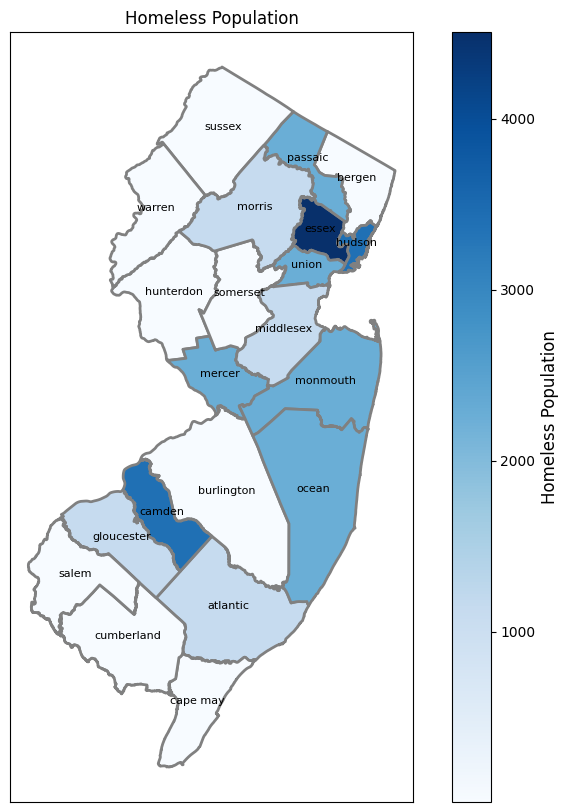

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot with specified colors (white to blue)
homeless_plot = njMerged.plot(ax=ax, column='population', cmap='Blues', scheme='natural_breaks', k=5,
                              edgecolor='grey', linewidth=2)

# Label each county with its name
for idx, row in njMerged.iterrows():
    # Use the centroid of each county geometry to place the text
    centroid = row['geometry'].centroid
    # Add the county name as a label at the centroid
    ax.text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Set the title of the plot
ax.title.set_text("Homeless Population")

# Remove x and y ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Create a color bar to show the gradient for population
norm = mpl.colors.Normalize(vmin=njMerged['population'].min(), vmax=njMerged['population'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# Add color bar to the right side of the plot
cbar.set_array([])  # This prevents a warning when setting up the color bar
cbar = fig.colorbar(cbar, ax=ax, orientation='vertical')
cbar.set_label('Homeless Population', fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Adjust tick label size

# Optional: Save the figure as a PDF
# plt.savefig('fig.pdf', bbox_inches='tight') # Uncomment this line to save the figure

# Show the plot
plt.show()

In [ ]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')


In [ ]:
col['enr'] = col.ENROLL.astype(float)

<Axes: >

<Axes: >

Text(446845.6710119825, 234718.67854471222, 'atlantic')

Text(608674.9722903798, 775344.9010704905, 'bergen')

Text(445015.10017129, 380378.9908087645, 'burlington')

Text(362977.140254135, 353705.812773536, 'camden')

Text(407013.1101691078, 114992.23820242906, 'cape may')

Text(319542.7506195572, 197359.46040186452, 'cumberland')

Text(562253.4894992855, 711675.2449585614, 'essex')

Text(311851.0044582621, 322497.09146205307, 'gloucester')

Text(608428.8356149012, 694107.9908801537, 'hudson')

Text(377593.6983420124, 631791.0280015195, 'hunterdon')

Text(435852.78759398806, 528228.3056099586, 'mercer')

Text(569736.7056196635, 519774.2489392377, 'monmouth')

Text(553566.9451515801, 382793.6503082437, 'ocean')

Text(547142.4144700206, 801720.2266180195, 'passaic')

Text(253014.767951469, 275761.56707926694, 'salem')

Text(459788.98517990607, 630164.5125108969, 'somerset')

Text(439541.23874521523, 839964.6338105244, 'sussex')

Text(545391.2858900087, 665430.0582508749, 'union')

Text(354515.98946147866, 737506.369618912, 'warren')

Text(479789.7234039994, 738913.4075906109, 'morris')

Text(516625.77448488685, 584830.6357102671, 'middlesex')

[]

[]

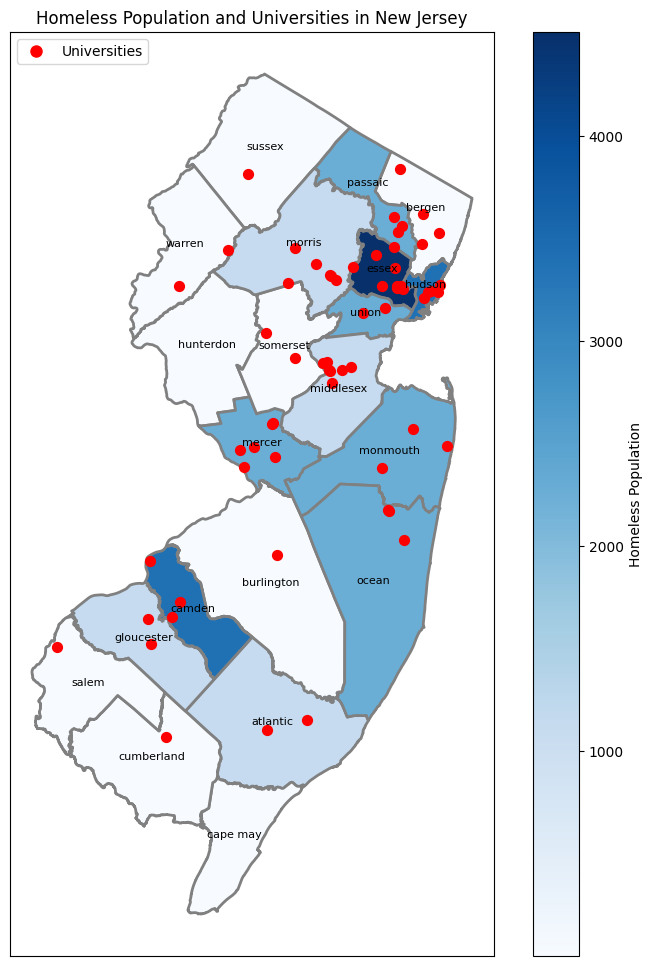

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl

# Plot homeless population and overlay universities
fig, ax = plt.subplots(1, figsize=(10, 12))

# Plot njMerged for homeless population, using a blue color scale
njMerged.plot(ax=ax, column='population', legend=False, cmap='Blues', scheme='natural_breaks', k=5,
              edgecolor='grey', linewidth=2)

# Overlay universities from the 'col' shapefile with red markers
col.plot(ax=ax, marker='o', color='red', markersize=50, legend=True, label='Universities')

# Label each county with its name in black
for idx, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Set the title for the map
ax.title.set_text("Homeless Population and Universities in New Jersey")

# Remove x and y axis ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Add a legend for the university markers manually
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Universities',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left')

# Create a colorbar for the homeless population data
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=njMerged['population'].min(), vmax=njMerged['population'].max()))
sm._A = []  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Homeless Population')

# Show the map
plt.show()


<Axes: >

Text(0.5, 1.0, 'Camden County Municipalities')

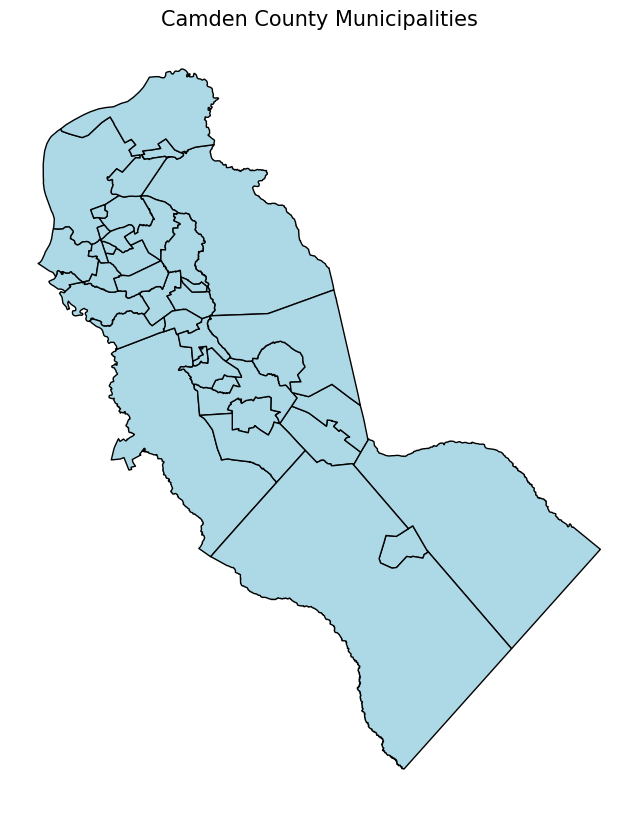

In [ ]:
! wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

zip_ref = zipfile.ZipFile('Municipality.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njMun=gpd.read_file('Municipalities.shp')

# Step 4: Plot the shapefile with black edges
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Create a figure and axis

# Plot with specified color and edgecolor
njMun.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title and remove axis for a cleaner look
ax.set_title('Camden County Municipalities', fontsize=15)
ax.set_axis_off()


# Show the plot
plt.show()

In [ ]:
col = gpd.read_file('Municipality.zip')
col.dtypes



,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [ ]:

njMun.dtypes #with geopandas can do stuff like with pandas :)
#njMun.info()

,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [ ]:
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

In [ ]:
MunPop=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')
#njMun1 = pd.merge(njMun, MunPop, on='Municipality',how='outer',indicator=True)
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

njMun1 = njMun.merge(MunPop, on='Municipality', how='left')

<Axes: >

[]

[]

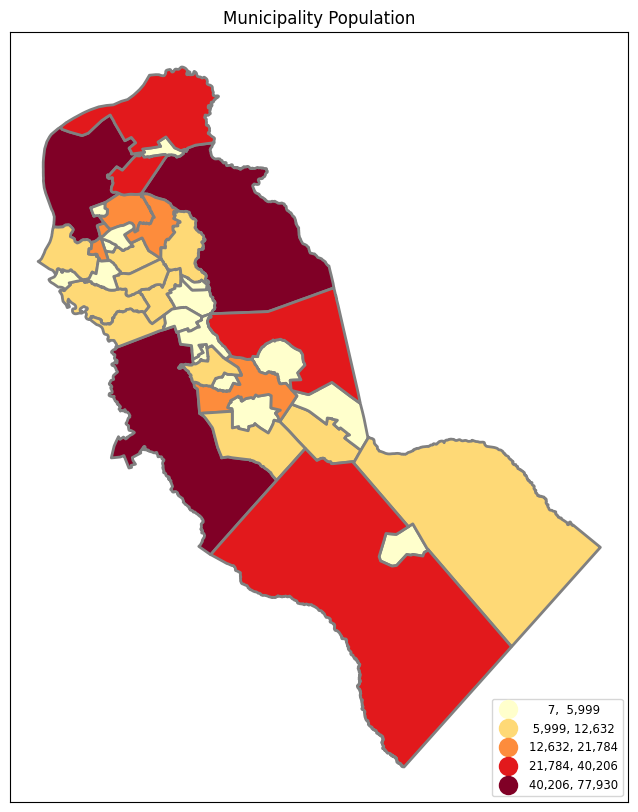

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
# Plot with specified color and edgecolor

njMun1.plot(ax=ax,column='population',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Municipality Population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
MunSch=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')